# Agents (joint)

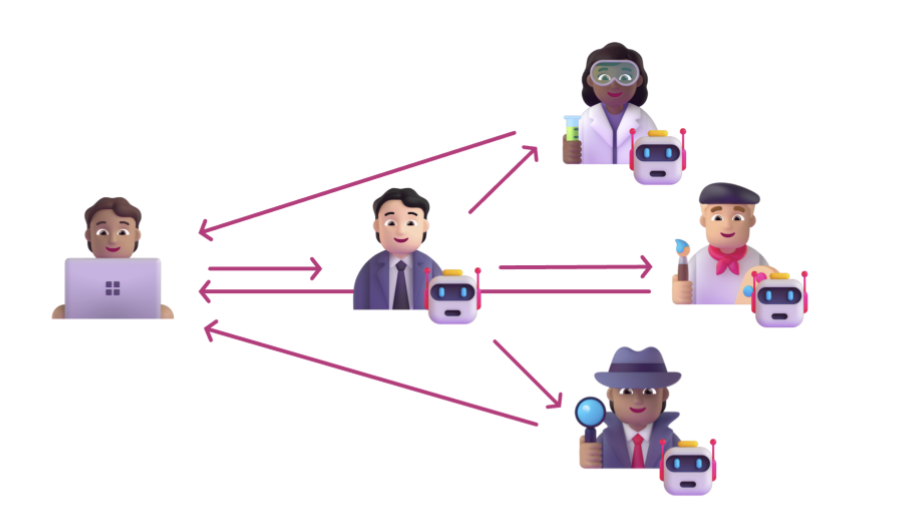

### Initialize the kernel

In [1]:
#r "nuget: Microsoft.SemanticKernel, 1.7.1"
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha"
#r "nuget: Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha"

#!import Settings.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Connectors.OpenAI;

var kernel = Settings.InitializeKernel();

Installed Packages Microsoft.SemanticKernel, 1.7.1 Microsoft.SemanticKernel.Plugins.Core, 1.7.1-alpha Microsoft.SemanticKernel.Plugins.Web, 1.7.1-alpha

Error: (3,19): error CS0246: The type or namespace name 'Kernel' could not be found (are you missing a using directive or an assembly reference?)
(15,19): error CS0246: The type or namespace name 'AzureOpenAIChatCompletionService' could not be found (are you missing a using directive or an assembly reference?)
(5,22): error CS0103: The name 'Kernel' does not exist in the current context
(17,20): error CS0246: The type or namespace name 'AzureOpenAIChatCompletionService' could not be found (are you missing a using directive or an assembly reference?)

Error: (6,14): error CS0103: The name 'Settings' does not exist in the current context

### Agents collaboration

### Joint with interraction (for loop)

In [ ]:
List<IAgent> agents = [];
IAgentThread? thread = null;

var newsPlugin = KernelPluginFactory.CreateFromType<AlertsPlugin>();

var jackAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.JackSparrowDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync());

var yodaAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.YodaDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync());

var narratorAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.NarratorAgent.yaml")
    .BuildAsync());

scriptSteps ??= ScriptSteps;
scriptSteps = scriptSteps!.First().Equals("string")
    ? ScriptSteps
    : scriptSteps;

var result = new List<string>();


thread = await narratorAgent.NewThreadAsync();
Log.Information($"DIALOG START (joint agents - for, thread id: {thread.Id})");
Log.Information("****************************************");

foreach (var scriptStep in scriptSteps)
{
    var messageUser = await thread.AddUserMessageAsync(scriptStep);
    Console.ForegroundColor = ConsoleColor.DarkGray;
    Console.WriteLine($"[SCRIPT: {messageUser.Content}]");
    Console.ResetColor();

    var jackAgentMessages = await thread.InvokeAsync(jackAgent).ToArrayAsync();
    foreach (var message in jackAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Yellow;
        Console.Write("    Jack Sparrow: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Jack Sparrow > {message.Content}");
    }

    var yodaAgentMessages = await thread.InvokeAsync(yodaAgent).ToArrayAsync();
    foreach (var message in yodaAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Blue;
        Console.Write("    Yoda: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Yoda > {message.Content}");
    }

    var shakespeareAgentMessages = await thread.InvokeAsync(shakespeareAgent).ToArrayAsync();
    foreach (var message in shakespeareAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Red;
        Console.Write("    Shakespeare: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Shakespeare > {message.Content}");
    }

    var quijoteAgentMessages = await thread.InvokeAsync(quijoteAgent).ToArrayAsync();
    foreach (var message in quijoteAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Green;
        Console.Write("    Don Quijote: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Don Quijote > {message.Content}");
    }

    var narratorMessages = await thread.InvokeAsync(narratorAgent).ToArrayAsync();
    foreach (var message in narratorMessages)
    {
        Console.ForegroundColor = ConsoleColor.Gray;
        Console.Write("    Narrator: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Narrator > {message.Content}");
    }
}

IAgent Track(IAgent agent)
{
    agents.Add(agent);

    return agent;
}

### Joint with stop condition (do-while loop)

In [ ]:
List<IAgent> agents = [];
IAgentThread? thread = null;

var newsPlugin = KernelPluginFactory.CreateFromType<AlertsPlugin>();

var jackAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.JackSparrowDialogAgent.yaml")
    .BuildAsync());

var yodaAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.YodaDialogAgent.yaml")
    .BuildAsync());

var moderatorAgent = Track(await new AgentBuilder()
    //.WithOpenAIChatCompletion(Env.Var("OpenAI:ModelId")!, Env.Var("OpenAI:ApiKey")!)
    .WithAzureOpenAIChatCompletion(Env.Var("AzureOpenAI:Endpoint")!, Env.Var("AzureOpenAI:ChatCompletionDeploymentName")!, Env.Var("AzureOpenAI:ApiKey")!)
    .FromTemplatePath(@"Agents/JointAgents.ModeratorAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync());

var result = new List<string>();

thread = await moderatorAgent.NewThreadAsync();
Log.Information($"DIALOG START (joint agents - do while, thread id: {thread.Id})");
Log.Information("****************************************");

var initialMessage = string.IsNullOrWhiteSpace(initialMessage)
    ? """
    Jack Sparrow, Shakespeare, Don Quijote, and Yoda are starting a debate about the best drink in the world.
    Each of them is trying to convince the others for the prefered drink.
    Soon some of them are getting convinced and they are starting to support the new drink.
    """
    : initialMessage;

var messageUser = await thread.AddUserMessageAsync(initialMessage);
Console.ForegroundColor = ConsoleColor.DarkGray;
Console.WriteLine($"[SCRIPT: {messageUser.Content}]");
Console.ResetColor();
var shouldContinue = true;
do
{
    var jackAgentMessages = await thread.InvokeAsync(jackAgent).ToArrayAsync();
    foreach (var message in jackAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Yellow;
        Console.Write("    Jack Sparrow: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Jack Sparrow > {message.Content}");
    }

    var yodaAgentMessages = await thread.InvokeAsync(yodaAgent).ToArrayAsync();
    foreach (var message in yodaAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Blue;
        Console.Write("    Yoda: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Yoda > {message.Content}");
    }

    var shakespeareAgentMessages = await thread.InvokeAsync(shakespeareAgent).ToArrayAsync();
    foreach (var message in shakespeareAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Red;
        Console.Write("    Shakespeare: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Shakespeare > {message.Content}");
    }

    var quijoteAgentMessages = await thread.InvokeAsync(quijoteAgent).ToArrayAsync();
    foreach (var message in quijoteAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Green;
        Console.Write("    Don Quijote: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Don Quijote > {message.Content}");
    }

    var moderatorMessages = await thread.InvokeAsync(moderatorAgent).ToArrayAsync();
    foreach (var message in moderatorMessages)
    {
        Console.ForegroundColor = ConsoleColor.Gray;
        Console.Write("    Moderator: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        PrintHelper.PrintLines(lines);
        Console.ResetColor();
        result.Add($"{message.Role} > Moderator > {message.Content}");
        if (!string.IsNullOrWhiteSpace(message.Content) && message.Content.Contains("CHEERS", StringComparison.OrdinalIgnoreCase))
        {
            shouldContinue = false;
        }
    }
}
while (shouldContinue);

IAgent Track(IAgent agent)
{
    agents.Add(agent);

    return agent;
}

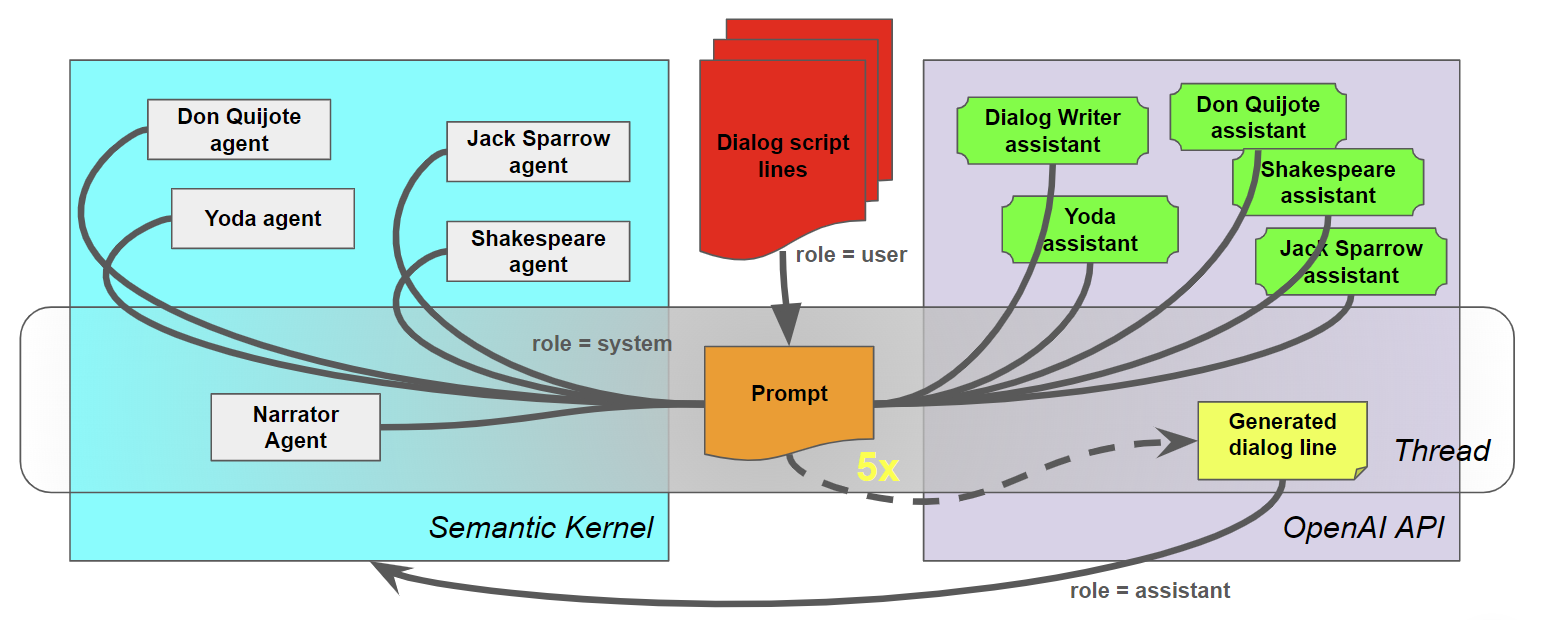